In [1]:
!pip install wordcloud
!pip install tensorflow
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import keras
import re
import nltk
import string
nltk.download('punkt')
from nltk.text import Text
plt.style.use('fivethirtyeight')
warnings.filterwarnings("ignore")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sazha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


**Import Dataset**

In [2]:
df = pd.read_csv('E:\Anitha\Data_Glacier\GitHub\VC\Week9\Twitter Dataset\Twitter Hate Speech.csv')
df.tail()

,id,label,tweet
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."
31961,31962,0,thank you @user for you follow


**Data Information**

In [3]:
print(f'Number of Observations: {df.shape[0]}')
print(f'Number of Features: {df.shape[1]}')

Number of Observations: 31962
Number of Features: 3


In [4]:
df.columns

Index(['id', 'label', 'tweet'], dtype='object')

In [5]:
df.dtypes

id        int64
label     int64
tweet    object
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [7]:
df.size

95886

**Check the missing value**

In [8]:
df.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

**Extracting the Target Attribute for Each Class and Visualize**

In [9]:
# Extract the Label Feature for Each Class
hate_speech = df[df['label'] == 1].shape[0]
free_speech = df[df['label'] == 0].shape[0]
print('Hate Speech =', hate_speech)
print('Free Speech =', free_speech)

Hate Speech = 2242
Free Speech = 29720


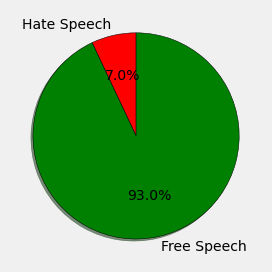

In [10]:
# Visualize the Label Class
speech = [hate_speech, free_speech]
label = ["Hate Speech", "Free Speech"]

plt.pie(speech, labels = label, shadow = True, wedgeprops = {'edgecolor': 'black'}, 
        autopct = '%1.1f%%', startangle= 90, colors=['red', 'green'])

plt.tight_layout()
plt.show()

**Data Preprocessing**

**Lower Case**

In [11]:
def lower_case(text):
    return text.lower()

df['tweet'] = df['tweet'].apply(lower_case)

**Remove Punctuation**

In [12]:
def remove_punct(text):
    return text.translate(str.maketrans('','',string.punctuation))

df['tweet'] = df['tweet'].apply(remove_punct)

**Remove URLs**

In [13]:
def remove_punct(text):
    return text.translate(str.maketrans('','',string.punctuation))

df['tweet'] = df['tweet'].apply(remove_punct)

**Removing tags**

In [14]:
def remove_tag(text):
    newtext= re.sub(r'(@[A-Za-z0-9]+)',"",text)
    return newtext

df['tweet'] = df['tweet'].apply(remove_tag)

**Remove Special Characters**

In [15]:
def remove_special(text):
    return " ".join(e for e in text.split() if e.isalnum())

df['tweet'] = df['tweet'].apply(remove_special)


**Preprocessing Opeartions**

**Word Cloud**

In [16]:
from nltk.tokenize import sent_tokenize, word_tokenize


In [17]:
def tokenize(text):
    text = word_tokenize(text)
    return text
df['tweet'] = df['tweet'].apply(tokenize)



**Removing Stopwords**

In [18]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sazha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [19]:
def remove_stop(text):
    text  = [i for i in text if not i in stopwords.words('english')]
    return text

    df['tweet'] = df['tweet'].apply(remove_stop)

**Lemmatization**

In [20]:
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sazha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [21]:
def Lemmatize(text):
    word_lem = WordNetLemmatizer()
    text = [word_lem.lemmatize(token) for token in text]
    return text

    df['tweet'] = df['tweet'].apply(Lemmatize)

In [22]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS



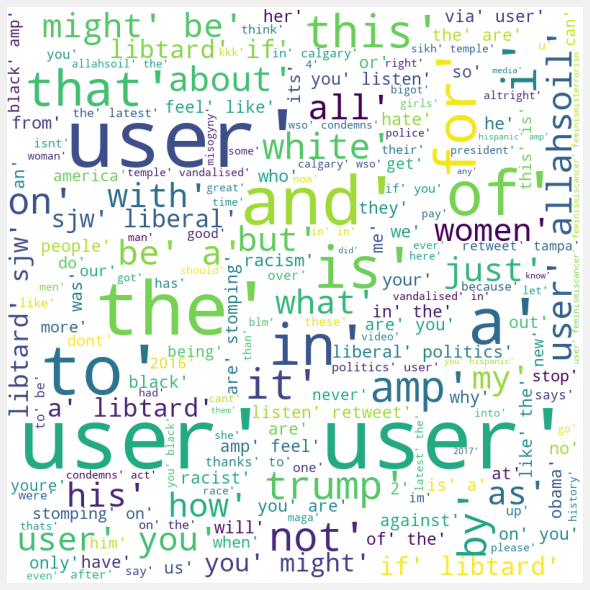

In [23]:
# WordCloud of Hate speech
hate_speech = df[df['label'] == 1]   
comment_words = ''
stopwords = set(STOPWORDS)
for val in hate_speech.tweet:
     
    
    val = str(val)
 
    tokens = val.split()
     

    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
                     
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()


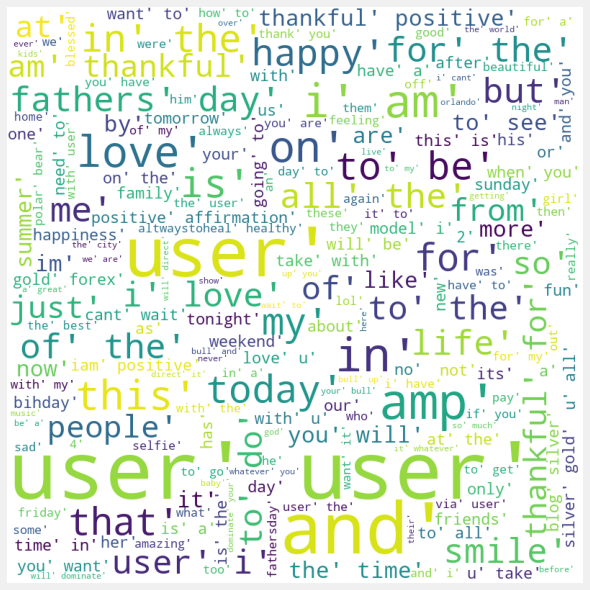

In [24]:
# WordCloud of free speech
free_speech = df[df['label'] == 0]   
comment_words = ''
stopwords = set(STOPWORDS)
for val in free_speech.tweet:
     
    #typecaste each val to string
    val = str(val)
 
    #split the value
    tokens = val.split()
     
    #Converts each token into lowercase
    for i in range(len(tokens)):
         tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

**Logistic Regression with TF-IDF on N-Grams model**

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay



In [26]:
list_to_str = []
for lists in df['tweet']:
    list_to_str.append(' '.join(map(str, lists)))

df['tweet'] = list_to_str

In [27]:
vect = TfidfVectorizer(ngram_range=(1,2)).fit(df['tweet'])


In [28]:
feature_names = vect.get_feature_names()
print("Number of features: {}\n".format(len(feature_names)))
print("First 20 features: \n{}".format(feature_names[:20]))

Number of features: 220140

First 20 features: 
['0000001', '0000001 polluting', '00027', '00027 photooftheday', '001', '0035', '00h30', '01', '01 blog', '01 croatia', '01 for', '01 in', '01 shopalyssas', '0115', '0115 8599968', '0161', '0161 manny', '019', '019 from', '01926889917']


In [29]:
vect = TfidfVectorizer(ngram_range=(1,3)).fit(df['tweet'])

In [30]:
feature_names = vect.get_feature_names()
print("Number of features: {}\n".format(len(feature_names)))
print("First 20 features: \n{}".format(feature_names[:20]))



Number of features: 464123

First 20 features: 
['0000001', '0000001 polluting', '0000001 polluting niger', '00027', '00027 photooftheday', '00027 photooftheday music', '001', '0035', '00h30', '01', '01 blog', '01 blog silver', '01 croatia', '01 croatia happy', '01 for', '01 for 4995', '01 for 7900', '01 in', '01 in may', '01 shopalyssas']


In [31]:
X = df['tweet']
Y = df['label']
X = vect.transform(X)

In [32]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [33]:
print("Size of x_train:", (x_train.shape))
print("Size of y_train:", (y_train.shape))
print("Size of x_test: ", (x_test.shape))
print("Size of y_test: ", (y_test.shape))


Size of x_train: (25569, 464123)
Size of y_train: (25569,)
Size of x_test:  (6393, 464123)
Size of y_test:  (6393,)


In [34]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_predict = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_predict, y_test)
print("Test accuarcy: {:.2f}%".format(logreg_acc*100))


Test accuarcy: 93.70%
